# Clasificación de correos

Hoy en día, la tecnología forma parte de la vida diaria del ser humano. Un caso particular es la mensajería, la cual, de ser su principal activo las cartas, evolucionó a los correos electrónicos y en los últimos años se han creado nuevas formas de comunicación como What's app. Sin embargo, los correos electrónicos no se ha vuelto obsoletos por completo y aún siguen siendo muy utilizados en ámbitos académicos y laborales. El objetivo especifico de este trabajo es construir un filtro de correos de spam, mediante modelos de clasificación de machine learning.

## **Metodología**

La metodología empleada en este estudio se basó en la obtención del conjunto de datos de Spam (Spam Data set) disponible en el repositorio UCI Machine Learning. Una vez obtenidos los datos se realizó un análisis exploratorio del conjunto de datos, buscando si existían datos faltantes, si las clases estaban balanceadas y obtener visualizaciones de los datos en espacio de baja dimensión para buscar patrones presentes en los atributos.

La base de datos tiene una variable respuesta ubicada en la columna 58 y 57 variables predictoras y debido a las estructuras de nuestros datos los atributos se pueden dividir en 3 categorías: la primera categoría está formada por las primeras 48 columnas obteniendo frecuencias de ciertas palabras de interés para el usuario que dono los correos como su nombre o código postal. La segunda categoría engloba 6 atributos, las cuales son las columnas 49 a 54 que contiene frecuencias de caracteres de interés, mientras que la última categoría consta de 3 atributos de las palabras en mayúsculas que se encuentran en correo.

Para los primeros dos conjuntos se analizaron representaciones de baja dimensión en dos dimensiones con distintas metodologías como componentes principales, aprendizaje en variedades y escalamiento dimensional. Por otro lado, en el tercer conjunto se analizó la representación por pares de variables. Después de conocer la estructura y propiedades de las observaciones, se procedió a ajustar una serie de clasificadores y analizar su desempeño.

En primer lugar, nuestra base de datos se dividió en dos subconjuntos; el conjunto de entrenamiento y el conjunto de prueba, con una proporción de 80\% para entrenamiento y el resto de prueba. Luego, para obtener una comparación del rendimiento de los clasificadores, se balancearon las clases dentro del conjunto de entrenamiento eliminado observaciones de la clase con más registros de manera aleatoria. Estos conjuntos se estandarizaron y se le ajustó el modelo de regresión lineal, una máquina de soporte de vectores, árboles de clasificación, algoritmos de ensamble como Adaboost y XGboost, análisis discrimínate lineal y cuadrático y una red neuronal con una arquitectura perceptron multicapa empleando la búsqueda en rejilla. Después, para la evaluación se calculó la matriz de confusión obtenida de cada clasificador y se contrastaron las matrices entre sí.

En segunda instancia, se realizó un análisis exhaustivo de los clasificadores utilizados en el primer enfoque, pero ahora empleando 3 versiones del conjunto de entretenimiento Spam. La primera versión es el conjunto original, la segunda versión es un conjunto balanceado por sobre muestreo con el algoritmo SMOTE (Synthetic Minority Over-sampling Technique) y el tercer conjunto es una versión obtenida al balancear por submuestreo (Edited Nearest Neighbor). Para cada uno de estos conjuntos se ajustaron diversas configuraciones de hiperparámetros y dos tipos de estandarización: MaxMin y normal.

Además, estas combinaciones de hiperparámetros se ajustaron con todos los atributos y con un subconjunto de atributos definidos por medio de la elección de características de PCA, lo cual dio como resultado un espacio grande de búsqueda, de manera que la optimización de hiperparámetros se realizó por medio de optimización Bayesiana. Por último, la mejor configuración de hiperparámetros por conjunto se evaluó en los datos de prueba y se calculó la matriz de confusión, la precisión, la métrica f1-score y recall.

## **Conjunto de datos spambase**

La base de datos empleada en este estudio es un conjunto de características de correos electrónicos y que sea han clasificado como spam o no spam con las etiquetas 0,1 respectivamente. El conjunto de datos de correos electrónicos categorizados como spam (no deseados) provienen del administrador y de personas que habían archivado el correo no deseado, mientras que los correos electrónicos que están etiquetados como no spam provino de correos electrónicos personales y de trabajo archivados y, por lo tanto, la palabra 'george' y el código de área '650' son indicadores de que no son spam. Estos son útiles cuando se construye un filtro de spam personalizado. Los datos se obtuvieron del repositorio de UCI Machine Learning  de la siguiente liga:
https://archive.ics.uci.edu/dataset/94/spambase. \\

La base de datos tiene 4601 registros donde cada registro tiene 58 atributos donde 57 de estas variables son continuas y el último atributo corresponde a la etiqueta de clase. Por otro lado, las clases de nuestros conjuntos no están balanceadas con 1813 (39.4\%) registros etiquetados como spam y 2788 (60.6\%) registros clasificados como no spam.

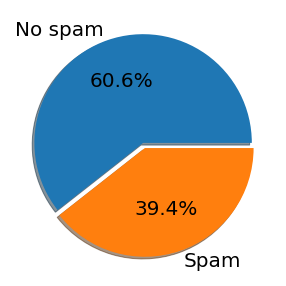

La mayoría de los atributos indican si una palabra o carácter en particular aparecía con frecuencia en el correo electrónico. Las primeras 48 columnas son variables continuas reales que representan el porcentaje de palabras en el correo electrónico que coinciden con cierta "palabra", por lo cual toma valores en el intervalo del $[0,100]$. Una "palabra" en este caso es cualquier cadena de caracteres alfanuméricos limitada por caracteres no alfanuméricos o fin de cadena.\\

Los siguientes 6 atributos siguientes representan el porcentaje de caracteres en el correo electrónico que coinciden con CHAR, por lo que son variables reales continuas con valores  en el intervalo $[0,100]$. Luego, la columna 55  es una variable continua real que registra la longitud promedio de secuencias ininterrumpidas de letras mayúsculas. Por otro lado, los atributos en las columnas 56 y 57 son variables discretas que contienen la longitud de la secuencia interrumpida más larga de palabras en mayúsculas y el número total de letras mayúsculas en el correo electrónico.\\

## **Análisis estadístico exploratorio**

En la siguiente tabla se muestran las estadísticas de ciertas columnas de nuestro conjunto de datos. En esta tabla podemos observar que los valores máximos están muy lejos de las medias, Además, se observa que los valores máximos son pequeños, lo que indica las palabras o caracteres estudiados no se presentan con mucha frecuencia

\begin{array}{|l|r|r|r|r|}
\hline
Columna &  Mínimo &     Máximo &       Media &       Varianza \\
\hline
1  &     0.0 &      4.540 &    0.104553 &       0.093223 \\
2  &     0.0 &     14.280 &    0.213015 &       1.665222 \\
3  &     0.0 &      5.100 &    0.280656 &       0.254105 \\
4  &     0.0 &     42.810 &    0.065425 &       1.946024 \\
48 &     0.0 &      4.385 &    0.038575 &       0.059265 \\
49 &     0.0 &      9.752 &    0.139030 &       0.073076 \\
54 &     1.0 &   1102.500 &    5.191515 &    1006.539105 \\
55 &     1.0 &   9989.000 &   52.172789 &   37974.367232 \\
56 &     1.0 &  15841.000 &  283.289285 &  367577.807860 \\
\hline
\end{array}

En la siguiente figura se muestra la estimación de la información mutua para la variable respuesta. La información mutua entre dos variables aleatorias es un valor no negativo, que mide la dependencia entre las variables. Es igual a cero si y solo si dos variables aleatorias son independientes, y los valores más altos significan una mayor dependencia. Los atributos con mayor información mutua en nuestro conjunto son las variables de frecuencia de los símbolos \! y \$, así como las variables que registran la longitud de mayúsculas más grande  y su promedio.

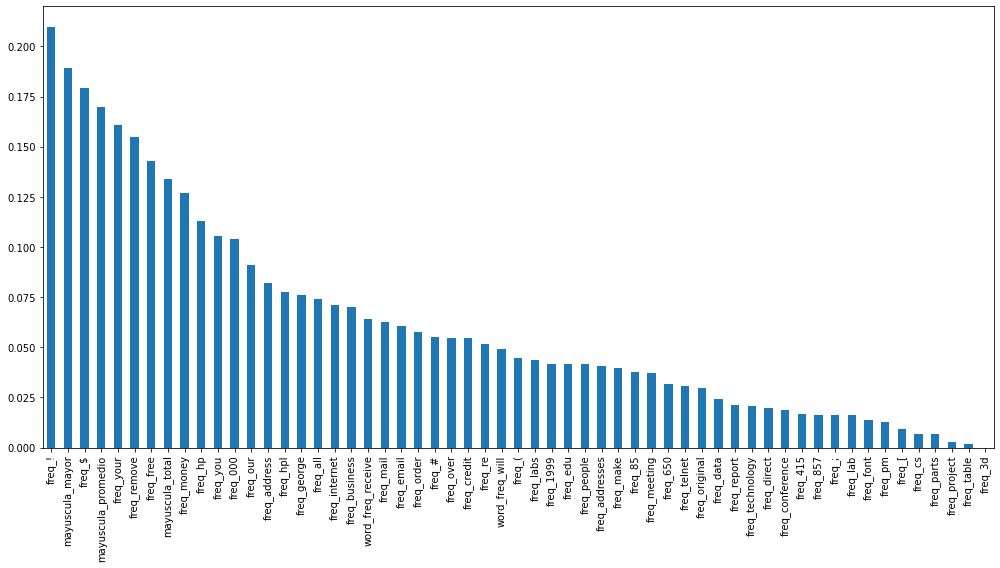

Sin embargo, los atributos no recuperan demasiada varianza explicada, En la Figura se muestran la varianza explicada con distintos números de componentes principales utilizados. Esto muestra que para obtener el 80\% de la varianza explicada se necesitan alrededor de 35 componentes.

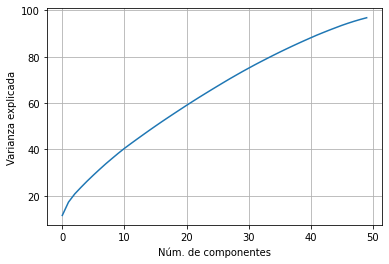

Los atributos se pueden dividir en 3 categorías: la primera categoría está formada por las primeras 48 columnas obteniendo frecuencias de ciertas palabras de interés para el usuario que dono los correos como su nombre o código postal. La segunda categoría engloba 6 atributos, las cuales son las columnas 49 a 54 que contiene frecuencias de caracteres de interés, mientras que la última categoría consta de 3 atributos de las palabras en mayúsculas.

Las palabras representadas por  los atributos por columna son las palabras en ingles make, address, all, 3d, our, over,remove, internet, order, mail, recive, will, people, report, addresse, free, business,email, you, credit, your, font, 000, money, hp, hpl, george, 650, lab, labs, telnet, 857, data, 415, 85, technology, 1999, parts, pm, direct, cs, meeting, original, project, re, edu:,table,conference. Por otro lado, los caracteres observados estudiados para crear las comunas de la base de datos son los carácter ';','(','[','!','\#','\$'.

Prosiguiendo con el análisis, para cada atributo se calcularon las estadísticas descriptivas por grupo. Al analizar las tablas observamos que la media de cada grupo es significativamente diferentes, al menos 3 o cuatro veces mayor. También, se observa que para cada uno de los atributos la diferencia entre el percentil del 75\% y el máximo es muy grande.

\begin{array}{||l||r|r|r|r|r|r|r|}
\hline
{} &        Media &        Desv. estándar &  Mínimo &     25\% &    50\% &    75\% &     Máximo \\
Spam &       &            &      &         &        &        &         \\
\hline
0.0  &  2.378147 &   5.115423 &  1.0 &  1.3845 &  1.857 &  2.555 &   251.0 \\
1.0  &  9.519165 &  49.846186 &  1.0 &  2.3240 &  3.621 &  5.708 &  1102.5 \\
\hline
\end{array}

\begin{array}{||l||r|r|r|r|r|r|r|}
\hline
{} &        Media &        Desv. estándar &  Mínimo &     25\% &    50\% &    75\% &     Máximo \\
Spam &       &            &      &         &        &        &         \\
\hline
0.0  &    18.223977 &   39.097219 &  1.0 &   4.0 &  10.0 &  18.0 &  1488.0 \\
1.0  & 104.393271 &  299.284969 &  1.0 &  15.0 &  38.0 &  84.0 &  9989.0 \\
\hline
\end{array}

\begin{array}{||l||r|r|r|r|r|r|r|}
\hline
{} &        Media &        Desv. estándar &  Mínimo &     25\% &    50\% &    75\% &     Máximo \\
Spam &       &            &      &         &        &        &         \\
\hline
0.0  &   161.544508 &  355.855147 &  1.0 &  18.25 &   54.0 &  141.0 &   5902.0 \\
1.0  &  470.619415 &  825.081179 &  2.0 &  93.00 &  194.0 &  530.0 &  15841.0 \\
\hline
\end{array}

## **Visualización en baja dimensión**

**Visualización en baja dimensión de atributos de palabras**

A continuación, se analizó el conjunto de los atributos de palabras, es decir, se estudiaron las primeras 48 columnas. Sin embargo, debido a la alta dimensionalidad de cada observación no fue posible graficar los registros por lo que se utilizaron distintas técnicas de reducción de dimensión para representar los atributos de palabras y buscar posibles patrones entre categorías o encontrar diferencias entre las clases. Para la reducción se utilizaron análisis de componentes principales como PCA, KPCA, aprendizaje en variedades como LLE, T-SNE y una metodología que respete distancias como MDS.

### Análisis de componentes principales (PCA)

El modelo de PCA encuentra direcciones de proyección que maximicen la varianza de los datos, por lo cual se busca vectores que sean solución al problema de optimización:
$$max_{\mathbf{u}}\; Var(u^TX)=u^TSu\;\;s.a \;\;||u||^2=1$$
donde S es la matriz de covarianzas muestral definida como $$S=\frac{1}{n}(X-\bar{X})^T(X-\bar{X}).$$

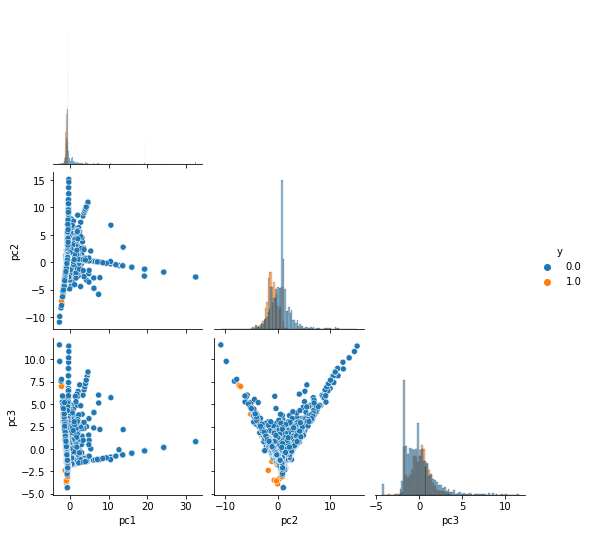

### Análisis de componentes principales con Kernel (KPCA)

El método Kernel PCA busca funciones de proyección suaves y de máxima varianza. Este método se basa en realizar el análisis de componentes principales en el espacio de características formado por la proyección de los datos por medio de funciones kernels. La función kernel k es una función que calcula el producto punto de dos puntos transformados mediante cierta función $\Phi$:
$$k(x, z) = \langle\Phi(x), \Phi(z)\rangle$$

La reducción de dimensión de los datos se logra por medio de la descomposición de valores singulares de la matriz de Gram K centrada definida como $$K=(I_{n\times n}-\frac{1}{n}1_{n}^{T}1_n)\frac{1}{n}(\Phi(X)^T\Phi(X))(I_{n\times n}-\frac{1}{n}1_{n}^{T}1_n).$$

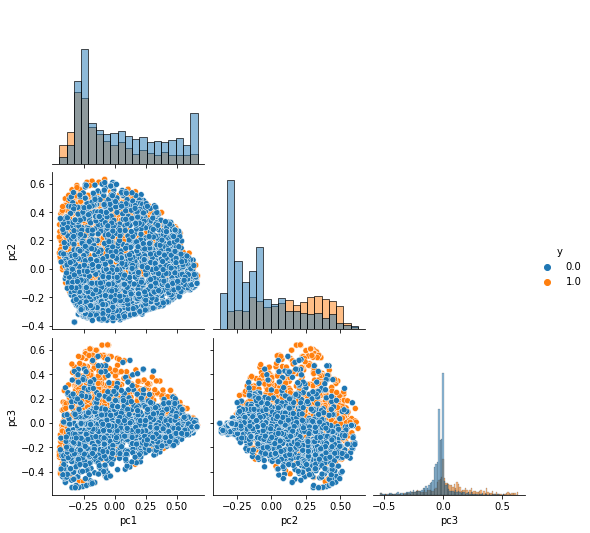

### Locally linear embedding (LLE)

El método de LLE construye estructuras lineales locales en cada uno de los puntos $\{x_i\}$ de los datos del conjunto $\{x_1,\dots,x_N\}$. La combinación óptima de pesos son determinados por el problema de mínimos cuadrados
$$min ||x_i-\sum_{j\in J_i}w_{ji}x_j||,\;\;s.t.\;\;\sum_{j\in J_i}w_{ji}=1$$
donde $N_i={x_j,j\in J_i}$ es el conjunto de vecinos del punto $x_i$.
Una vez obtenidos los conjuntos $\{w_{ji},j\in J_i\}$ con $i=1,\dots, N$, el método de LLE proyecta los datos de entrada $\{x_1,\dots,x_N\}$ a un conjunto de baja dimensión d dimensional $\{t_1,\dots,t_N\}$ tal que \cite{r12}
$$min_{T=[t_1,\dots,t_N]} \sum_{i}||t_i-\sum_{j\in J_i}w_{ji}t_j||^2,\;\;s.t.\;\; TT^{T}=I$$

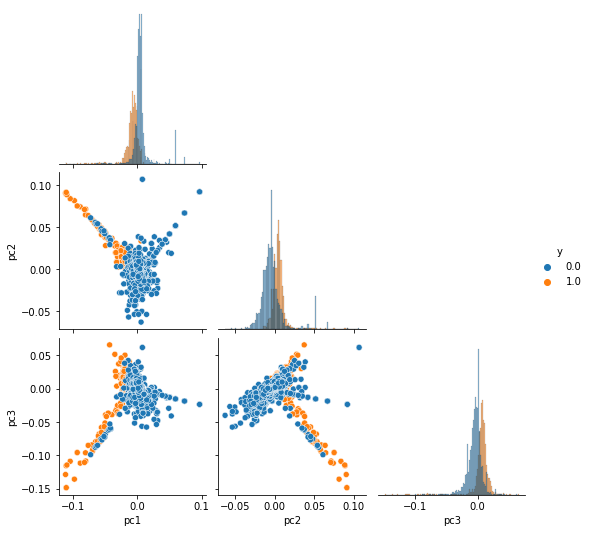

### T-distributed stochastic neighbor embedding  (t-SNE)

El método de t-SNE comienza construyendo una distribución de probabilidad para cada par de datos, de tal manera que a los objetos similares se les asigna una probabilidad mayor, mientras que a los puntos lejanos se les asigna una probabilidad muy pequeña por medio de:
$$\begin{array}{cc}
    p_{j\mid i}=\frac{\exp(-\lVert \mathbf {x}_{i}-\mathbf{x}_{j}\rVert^{2}/2\sigma_{i}^{2})}{\sum_{k\neq i}\exp(-\lVert \mathbf {x} _{i}-\mathbf {x} _{k}\rVert ^{2}/2\sigma _{i}^{2})} &  i\neq j\\
    p_{j\mid i} = 0 &  i=j
\end{array}$$


$$p_{ij}=\frac{p_{j\mid i}+p_{i\mid j}}{2n}$$

La metodología de t-SNE tiene como objetivo generar un embedding d-dimensional ${y}_{1},\dots ,{y}_{n}$ que refleja las similitudes $p_{ij}$ tan bien como sea posible. De manera que, las similaridad entre las ${y}_{i}$ y  ${y}_{j}$ se definen como:
$$\begin{array}{cc}
    q_{ij}=\frac {(1+\lVert \mathbf {y} _{i}-\mathbf {y} _{j}\rVert ^{2})^{-1}}{\sum _{k}\sum _{l\neq k}(1+\lVert \mathbf {y} _{k}-\mathbf {y} _{l}\rVert ^{2})^{-1}} &  i\neq j\\
    q_{j\mid i} = 0 &  i=j
\end{array}$$

Además, t-SNE usa una distribución de colas pesadas para modelar la similaridad de las observaciones en la variedad. Después, el método busca minimizar la divergencia Kullback-Leibler (divergencia KL) entre las dos distribuciones \cite{r11}:
$${\displaystyle \mathrm {KL} \left(P\parallel Q\right)=\sum _{i\neq j}p_{ij}\log {\frac {p_{ij}}{q_{ij}}}}$$

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


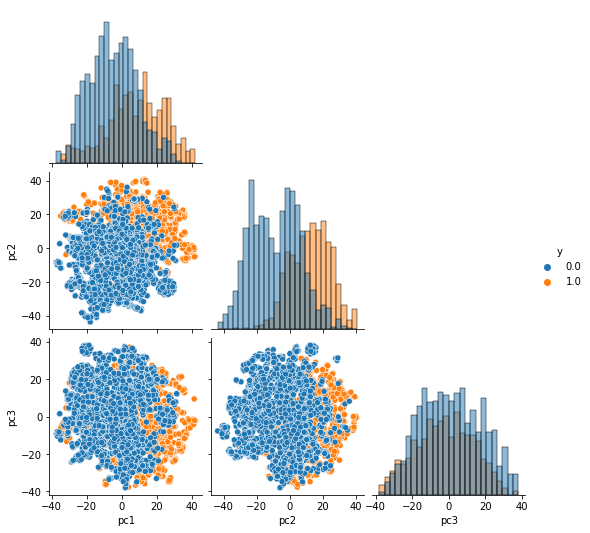

### Spectral embedding

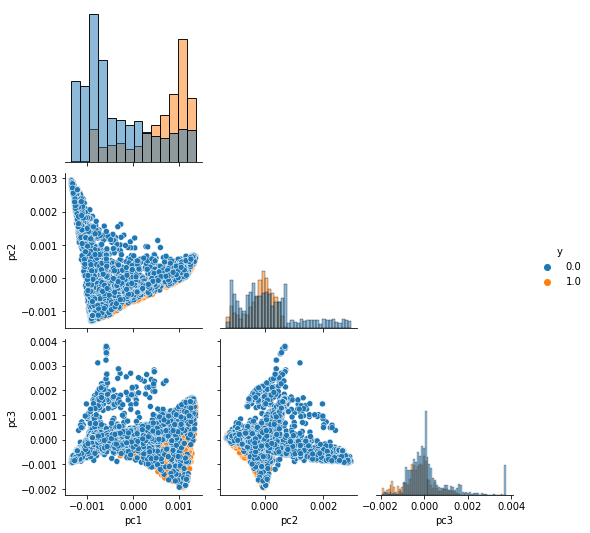

### Escalamiento multidimensional

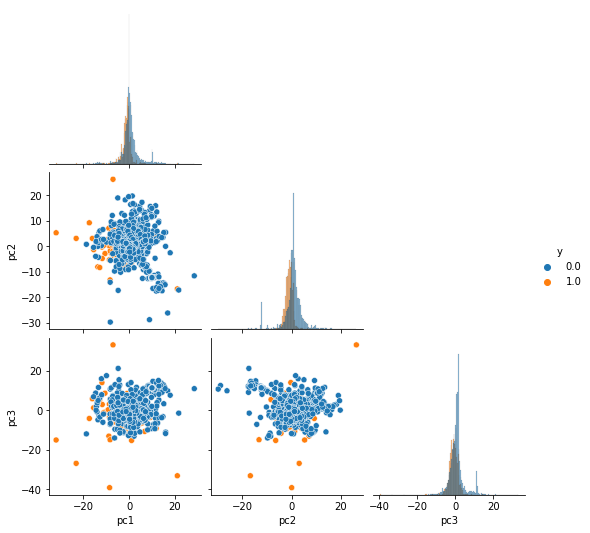

Las proyecciones no mostraron una buena discriminación de los correos, pero la proyección en baja dimensión con el algoritmo LLE muestra comportamiento distinto para la nube de puntos de cada etiqueta. Por último, se realizó un procedimiento análogo al realizado con anterioridad sobre los atributos de las frecuencias de características. Estas representaciones en baja dimensión mostraron patrones más interesantes, en especial en la representación de la proyección obtenida con el análisis de componentes principales con Kernel y el escalamiento multidimensional.

## **Visualización en baja dimensión de atributos de caracteres**

### PCA

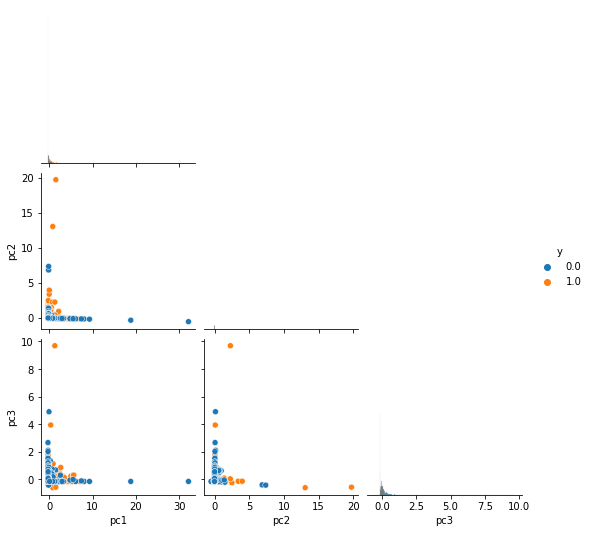

In [ ]:
pca = PCA(n_components=3)
result = pca.fit_transform(Char_atr)
proj = pd.DataFrame(result,columns = ['pc1','pc2','pc3'])
proj['y']=y
sns.pairplot(proj,hue = 'y',data = proj,corner=True,diag_kind="hist")

### **Kernel PCA**


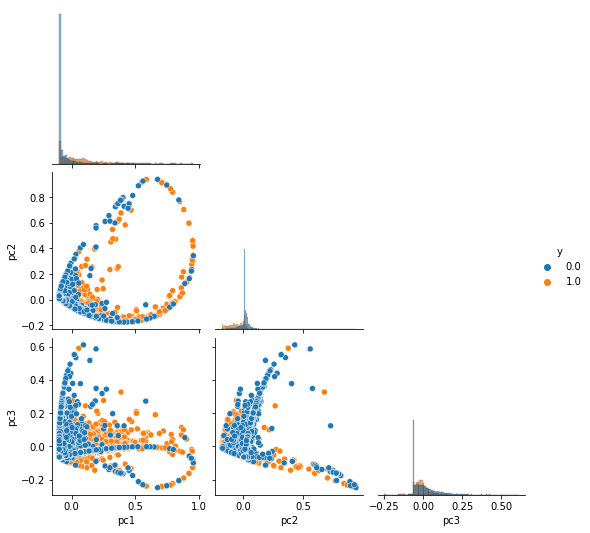

In [ ]:
sigma = 10
kernel_pca = KernelPCA(n_components=3, kernel='rbf', gamma=1/sigma,eigen_solver='arpack')
result = kernel_pca.fit_transform(Char_atr)
proj = pd.DataFrame(result,columns = ['pc1','pc2','pc3'])
proj['y']=y
sns.pairplot(proj,hue = 'y',data = proj,corner=True,diag_kind="hist")

### **Locally Linear Embedding**

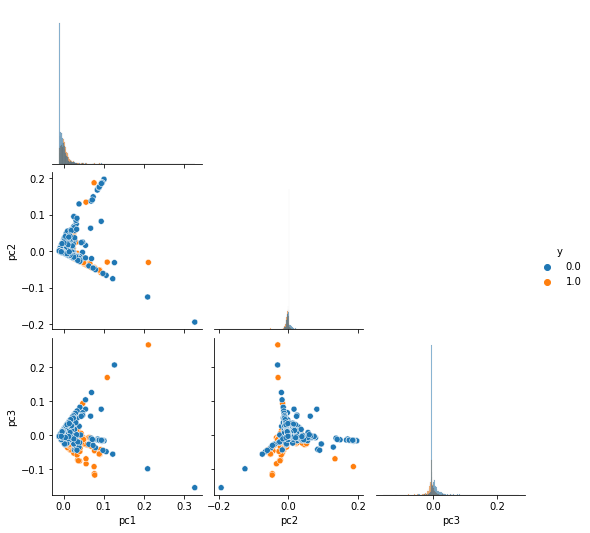

In [ ]:
n_neigh = 50
result = LocallyLinearEmbedding(n_components=3,eigen_solver='arpack',n_neighbors=300, random_state=0).fit_transform(Char_atr)
proj = pd.DataFrame(result,columns = ['pc1','pc2','pc3'])
proj['y']=y
sns.pairplot(proj,hue = 'y',data = proj,corner=True,diag_kind="hist")

### **Spectral embedding**

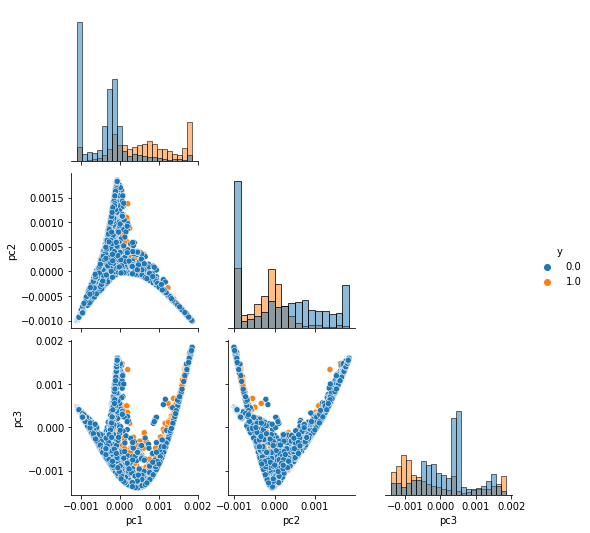

In [ ]:
aff = 'nearest_neighbors'
result = SpectralEmbedding(n_components=3, affinity=aff,
                              eigen_solver='arpack',n_neighbors=300, random_state=0).fit(Char_atr).embedding_

proj = pd.DataFrame(result,columns = ['pc1','pc2','pc3'])
proj['y']=y
sns.pairplot(proj,hue = 'y',data = proj,corner=True,diag_kind="hist")

### **T-SNE**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


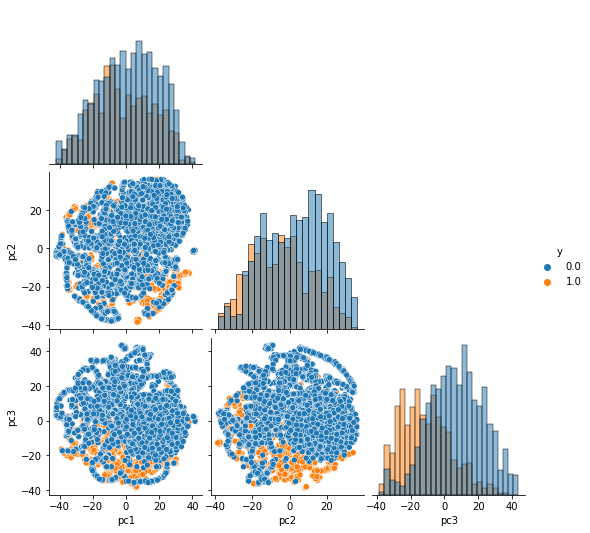

In [ ]:
perp = 10
tsne = TSNE(n_components=3,init = 'random', perplexity=perp, method='exact',n_iter=1000, n_iter_without_progress=300, n_jobs=2, random_state=0)
result = tsne.fit_transform(Char_atr)
proj = pd.DataFrame(result,columns = ['pc1','pc2','pc3'])
proj['y']=y
sns.pairplot(proj,hue = 'y',data = proj,corner=True,diag_kind="hist")

### **Escalamiento multidimensional**

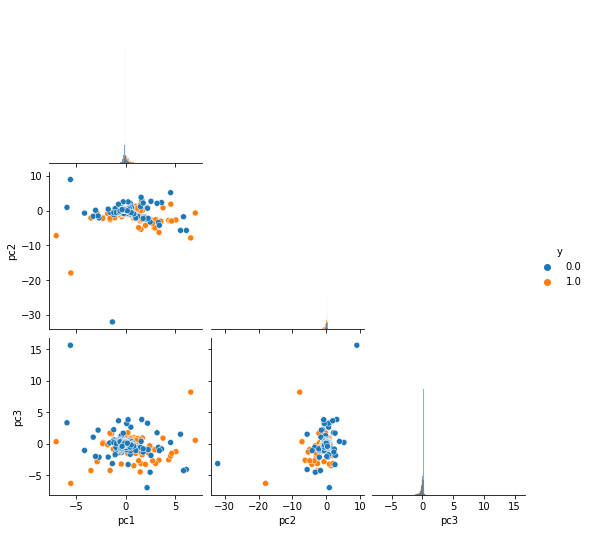

In [ ]:
result = MDS(n_components=3, metric=True, n_init=4, max_iter=300, random_state=0,
    dissimilarity='euclidean').fit_transform(Char_atr)
proj = pd.DataFrame(result,columns = ['pc1','pc2','pc3'])
proj['y']=y
sns.pairplot(proj,hue = 'y',data = proj,corner=True,diag_kind="hist")

Las proyecciones no mostraron una buena discriminación de los correos, pero la proyección en baja dimensión con el algoritmo muestra comportamiento distinto para la nube de puntos de cada etiqueta. Por último, se realizó un procedimiento análogo, realizado con anterioridad, sobre los atributos de las frecuencias de características. Estas representaciones en baja dimensión mostraron patrones más interesantes, en especial en la representación  obtenida con el análisis de componentes principales con Kernel y el escalamiento multidimensional. Estas proyecciones muestran en cierto grado una separación de las clases, sin embargo, aún existe una gran cantidad de nube de puntos que se sobreponen.

## **Modelos de aprendizaje**

A continuación, se muestran los resultados al aplicar diversos modelos de aprendizaje supervisado en nuestro conjunto de datos, en donde para cada modelo se realizó una optimización de hiperparámetros sobre un conjunto finito de combinaciones. En primer lugar, se da una breve introducción del modelo seguido por las métricas de rendimiento por clase y en promedio. Por último, se graficaron dos matrices de confusión: en la primera matriz se muestra el número de predicciones por clase y en la segunda se muestra la proporción de clases.

### Regresión logistica

La regresión logística forma parte de los modelos lineales generalizados (GLM)  que son una generalización flexible de la regresión lineal. Éste es un algoritmo de clasificación que se utiliza para predecir la probabilidad de una variable dependiente categórica. En ella $y$ es una variable Bernoulli y tiene dos posibles valores que toman las siguientes probabilidades: $P(y=1)=p$ y $P(y=0)=1-p$. Además, se puede representar como se muestra a continuación:

$$logit(p)=\log (\frac{P(y=1|x)}{P(y=0|x})=\beta_0 + \beta'x$$
\noindent que es la función logit, que es modelar linealmente el logaritmo de los monomios de las probabilidades posteriores respecto auna probabilidad de referencia. Se puede representar cada una de la siguiente forma:

$$P(y=1|x)=\frac{e^{\beta_0 + \beta'x}}{1+e^{\beta_0 + \beta'x}}$$
$$P(y=0|x)=\frac{1}{1+e^{\beta_0 + \beta'x}}$$

De esta forma se determinan los mejores valores de $\beta_0$ y $\beta$ donde estos valores se acerquen más a las respuestas reales $y_i$ para cada $i=1,...,n$. Uno de los métodos que suele aplicarse para encontrar los parámetros es Máxima Verosimilitud, donde se estima $\beta$ que es el valor que maximiza la logverosimilitud que se representa por:

$$l(\beta)=\sum_{i=1}^{n} (y_i\log P(x_i;\beta) + (1-y_i)\log(1-P(x_i;\beta)))$$

donde si $y_i=0$ entonces $l(\beta)=\log(1-P(x_i;\beta))$, si $P(x_i;\beta)$ es cercana a $y_i=0$ entonces $\log(1-P(x_i;\beta))$ es cercano a 0. Si $y_i=1$ se tiene que $l(\beta)=\log P(x_i;\beta)$, si $P(x_i;\beta)$ es cercana a $y_i=1$ entonces $\log P(x_i;\beta)$ está cercano a 0, si está lejos de 1, entonces es un número negativo muy grande. Otro método que se puede utilizar es el método mínimos cuadrados pesados iterativos llamado método de Newton-Rahpson.

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       558
         1.0       0.91      0.89      0.90       363

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921


Accuracy : 0.9218241042345277
Recall : 0.8898071625344353
F1-Score : 0.8997214484679666
Precision score: 0.9098591549295775


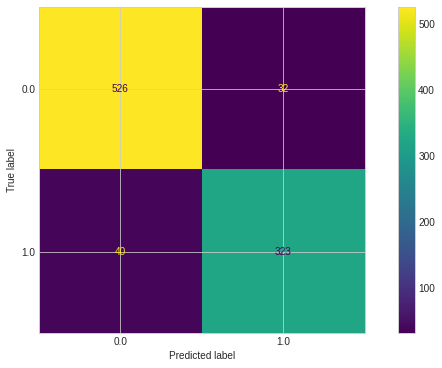

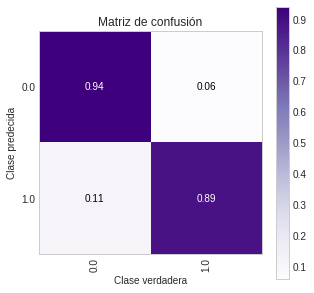

### Maquina de soporte vectorial

Es un método de aprendizaje supervisado consta de hiperplanos que ayudan a la clasificación de los datos que se dan, como inicio se tenía para una clasificación binaria, pero se ha extendido. Se muestra el caso binario debido a los datos que se tiene. Un hiperplano en dos dimensiones está definido como sigue:

$$f(x)=\beta_0+\beta_1 x_1+\beta_2 x_2=0$$

que en este caso es una recta. De manera que se traza una división que se le conoce como frontera, que para los mejores casos, debe ser lo más amplia posible.

Se le nombra al método de esa forma ya que los llamados  ''vectores de soporte''  son,  puntos que definen el margen de separación del hiperplano encargado de separar las clases, dado que se pueden tener tantos elementos como dimensiones se tengan se dicen vectores.

Para el caso binario se puede ver de la siguiente manera. Sean $x_i\in R^2$ y $y \in\{-1,1\}$, los datos que se tienen para entrenar el modelo. Cuando se tiene definido el hierplano, ahora lo que se quiere hacer es clasificar nuevos datos, donde los valores de la variable respuesta puede ser $y_r\in \{-1,1\}$, pero existen varias rectas que separan a los puntos y lo que se quiere es encontrar un hiperplano que su  distancia mínima entre el mismo y las observaciones sea lo más grande posible. Entonces para ello se calcula la distancia $d_+$ más corta a un punto de la clase $1$ y $d_-$ la más corta a un punto de la clase $-1$, que sería el margen que está dado por $M=\frac{2}{\beta}$ como lo que se quiere es maximizar el margen se tiene lo siguiente:
$$\max_{\beta_0, \beta,||\beta||=1} M$$ sujeto a $y_i(\beta_0+\beta_1 x_1+\beta_2 x_2)\geq M$. Pero ya que se puede definir $||\beta||=\frac{1}{M}$ se redefine a: $$\min_{\beta_0, \beta} \frac{1}{2}||\beta||^2$$ sujeto a $y_i(\beta_0+\beta_1 x_1+\beta_2 x_2)\geq 1$ que al final es un problema de optimización convexo que se puede resolver con el Lagrangiano dual.

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       558
         1.0       0.90      0.91      0.91       363

    accuracy                           0.93       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921


Accuracy : 0.9250814332247557
Recall : 0.9146005509641874
F1-Score : 0.9058663028649387
Precision score: 0.8972972972972973


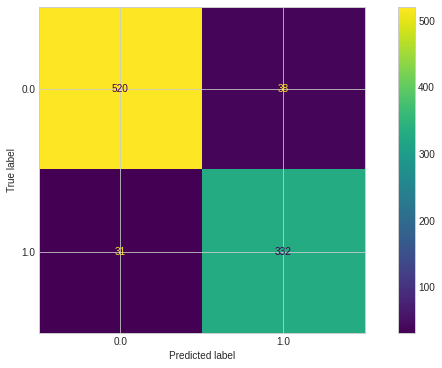

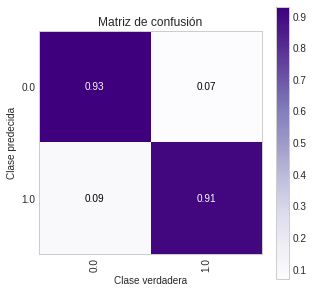

### Arboles de clasificación

Los árboles de clasificación son un procedimiento que tiene jerarquía para poder predecir la clase de un objeto  de acuerdo a las variables que se tienen. Éstos se componen de ramas que representan las decisiones que se toman de acuerdo a las variables que se conocen. Es como una secuencia ordenada de preguntas con un tipo de respuestas binaria, para la clasificación.

Si se considera un conjunto de $n$ datos de entrenamiento, que se tomarán como ejemplos, es decir clases conocidas para construir el árbol. Un nodo es un subconjunto de variables, que son las $x_i$, un nodo no terminal es un nodo que se divide en otros dos nodos llamados nodos hijos y los recuadros son nodos terminales que asignan la clase a un objeto y entre ellos pueden compartir clases.

Para construir un árbol se debe decidir las reglas para dividir cada uno de los nodos, recordando que al inicio todos los valores están en el primer nodo y se deben ir clasificando. Escoger el criterio para poder dividir el nodo, este paso es muy importante ya que la precisión del árbol está influido en la forma en la que se divide.

Existen varios criterios para dividir algunos de ellos son:

- Ganancia de información, donde se toma en cuenta la entropía que se define como sigue: $entropia(S)=-\sum_{i=1}^n p_i log_2(p_i)$ donde $S$ es el conjunto de datos en el que se calcula la entropía, $p_i$ es la proporción de puntos que pertenecen a cierta clase, si todos las muestras corresponden a cierta clase entonces la entropía es cero. Esto da paso a la siguiente fórmula: $IG(S,A)=entropia(S)-\sum_{v\in valores(A)} \frac{|S_v|}{|S|} entropia(S_v)$ donde $A$ representa una etiqueta de una clase, después se tiene la proporción de los $S_v$ al número de valores en $S$.

- Impureza de Gini, es la probabilidad de que los nuevos datos se clasifiquen incorrectamente si se les asigna una etiqueta clase aleatoria de acuerdo con la distribución de clases en el conjunto de datos, está representado de la siguiente forma: $G(S)=1-\sum_i p_i^2$. La impureza será máxima cuando las clases estén efectivamente mezcladas.
    

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       558
         1.0       0.90      0.88      0.89       363

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921


Accuracy : 0.9142236699239956
Recall : 0.8787878787878788
F1-Score : 0.8898186889818688
Precision score: 0.9011299435028248


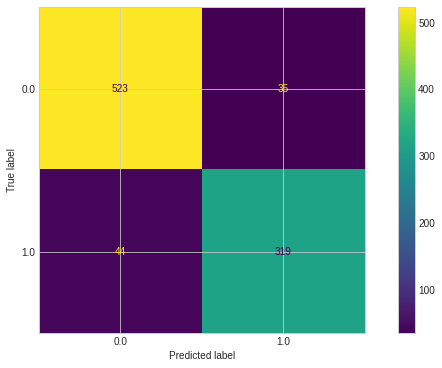

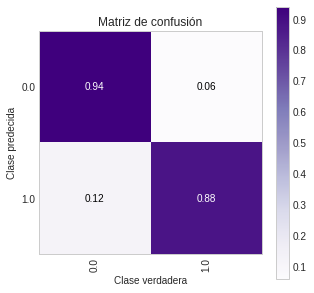

### Boosting adaptativo (AdaBoost)

Es un método de clasificación propuesto por  Yoav Freund and Robert Schapire en los 90's, donde se combinan varios clasificadores ''débiles'' para mejorar el desempeño. Es decir, primero se crean varios ''debiles'' de manera secuencial de modo que el siguiente predictor ajuste lo que el anterior no hizo y así con cada uno.

Se inicia con un conjunto de entrenamiento: $\{x_i, y_i\}, x_i\in R^d$, donde $y_i \in \{-1,1\}$ y un conjunto de pesos $w_i$ para cada una de las observaciones que se inicializan con $1/n$.

Para $m=1,...,M$ Se ajusta un clasificador $h_m(x)$ y se calcula el error asociado a cada $\epsilon_m$, de la siguiente forma:
$$\epsilon_m=\frac{\sum _i w_i^{(m)} I(y_i\neq h_m(x_i))}{\sum_i w_i^{(m)}}$$

después se calcula
$$\alpha_m=log((1-\epsilon_m)/\epsilon_m)$$
y se actualizan los pesos con
$$w_i^{(m+1)}=w_i^{(m)} \exp(\alpha_m I(y_i\neq h_m(x_i)))$$
para $i=1,2,...,n$.

Posterior a calcular los $M$ clasificadores se calcula un clasificador final $$H(x)=signo(\sum_m \alpha_mh_m(x))$$.

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       558
         1.0       0.95      0.91      0.93       363

    accuracy                           0.95       921
   macro avg       0.95      0.94      0.94       921
weighted avg       0.95      0.95      0.95       921


Accuracy : 0.9467969598262758
Recall : 0.9090909090909091
F1-Score : 0.9308885754583921
Precision score: 0.953757225433526


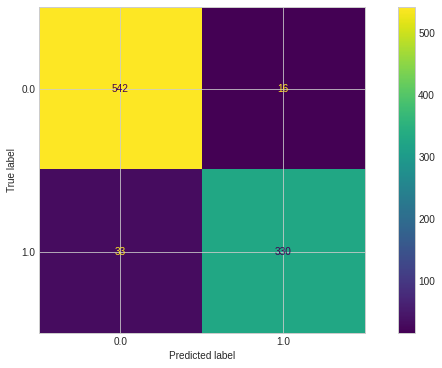

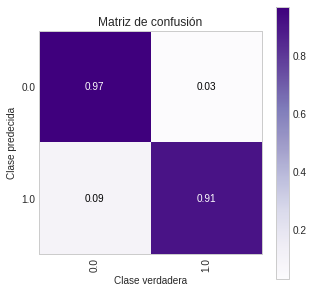

### Análisis de discriminante lineal

En estos métodos se considera que nuestros datos provienen de una distribución normal con varianzas iguales:
$$X|y_i \sim N(\mu_i, \Sigma)$$
Las funciones discriminantes, o en general, el clasificador induce fronteras de clasificación lineales. Esas fronteras son aquellas donde las probabilidades posteriores son iguales. Este es método analoga a LDA, en el  cual se considera que nuestros datos provienen de una distribución normal pero con varianzas arbitarias:
 $$X|y_i \sim N(\mu_i, \Sigma_i)$$

**LDA**

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       558
         1.0       0.89      0.84      0.86       363

    accuracy                           0.90       921
   macro avg       0.89      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921


Accuracy : 0.8957654723127035
Recall : 0.837465564738292
F1-Score : 0.8636363636363636
Precision score: 0.8914956011730205


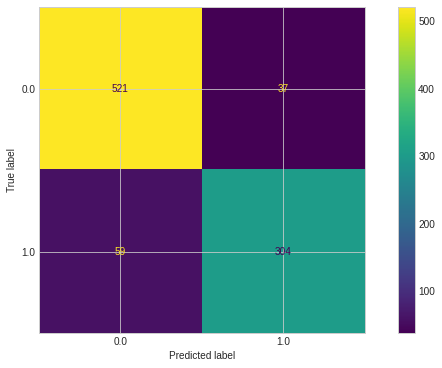

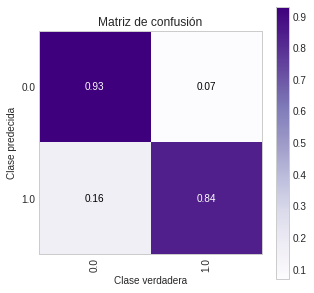

**QDA**

              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86       558
         1.0       0.73      0.94      0.83       363

    accuracy                           0.84       921
   macro avg       0.84      0.86      0.84       921
weighted avg       0.87      0.84      0.84       921


Accuracy : 0.8425624321389794
Recall : 0.9449035812672176
F1-Score : 0.825511432009627
Precision score: 0.7329059829059829


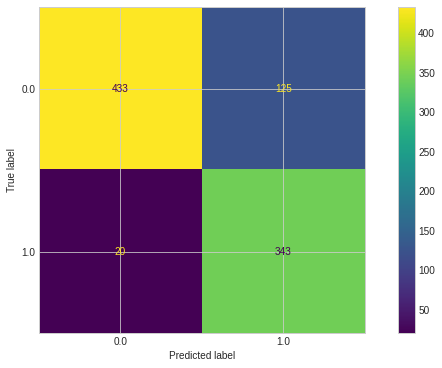

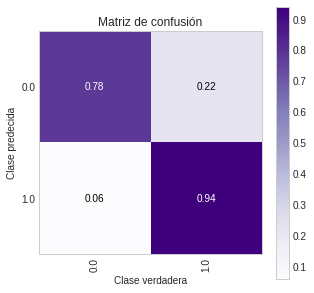

### Perceptron multicapa

Es una red neuronal que tiene como mínimo tres tipos de capas:
- Capa de entrada, en este caso con 3 nodos
- Capa oculta, en este caso son 3 capas con 4 nodos
- Capa de salida, con 1 nodo

La capa de entrada recibe los datos que serán procesados. La capa de salida realiza la predicción y la clasificación. Las capas ocultas son las que realizan el trabajo pesado en este tipo de red, cada una de las capas alimenta a la siguiente con el resultado de su cálculo.

Suponiendo que se tienen una sola capa de salida y una oculta en ellas se hacen los calculos con lo siguiente:
$$o(x)=G(b(2)+W(2)h(x))$$
$$h(x)=s(b(1)+ W(1)x)$$

con vectores de sesgo $b_1$ y $b_2$ con matrices de peso $W(1)$ y $W(2)$ y las funciones de activación $G$ y $s$. Las funciones de activación más comunes de elegir para $s$ son $tanh(a)=\frac{(e^a -e^{-a}}{e^a + e^{-a}}$ o $sigmoide(a)=\frac{1}{1+e^{-a}}$.

Algo importante es el backpropagation, que este mecanismo permite que el perceptrón ajuste iterativamente los pesos en la red, minimizando la función de costo que suele ser por un algoritmo de descenso por gradiente donde además tiene parámetros de regularización o sobreajuste. Este proceso sigue hasta que el gradiente de cada par de datos  entrada-salida haya convergido. Algunas de las funciones de costo son, entropía cruzada binaria, entropía cruzada discreta, MSE, entropía cruzada, dependiendo del tipo de salida y la distribución.



              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       558
         1.0       0.91      0.92      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921


Accuracy : 0.9315960912052117
Recall : 0.9228650137741047
F1-Score : 0.9140518417462483
Precision score: 0.9054054054054054


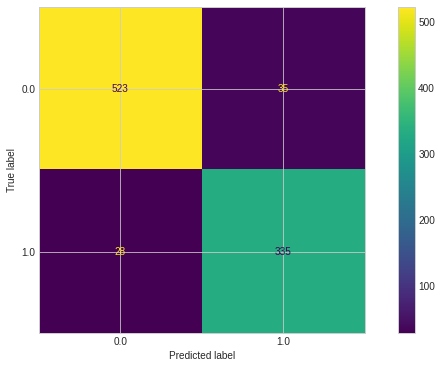

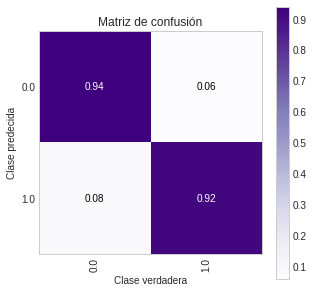

## Resultados de optimización

Por último se muestran los resultados obtenidos al aplicar distintos modelos de machine learning en tres tipos de datos derivados del conjunto original:
- Originales: Conjunto de datos original del repositorio
- Oversampling: Conjunto de datos con clases balanceadas utilizando técnicas de para aumentar las clases minoritarias. 
- Undersampling: Conjunto de datos con clases balanceadas, tomando una muestra aleatoria de los grupos más grandes.

### Regresión Logística

\begin{array}{lrrr}
{} &  Originales &  Oversampling &  Undersampling \\
Accuracy  &    0.917481 &      0.926167 &       0.920738 \\
Recall    &    0.859504 &      0.895317 &       0.909091 \\
F1 Score  &    0.891429 &      0.905292 &       0.900409 \\
Precision &    0.925816 &      0.915493 &       0.891892 \\
\end{array}

### Máquinas de soporte de vectores

\begin{array}{lrrr}
{} &  Originales &  Oversampling &  Undersampling \\
Accuracy  &    0.918567 &      0.929425 &       0.920738 \\
Recall    &    0.865014 &      0.887052 &       0.909091 \\
F1 Score  &    0.893314 &      0.908322 &       0.900409 \\
Precision &    0.923529 &      0.930636 &       0.891892 \\
\end{array}

### Árboles de clasificación y regresión
\begin{array}{lrrr}
{} &  Originales &  Oversampling &  Undersampling \\
Accuracy  &    0.916395 &      0.912052 &       0.905537 \\
Recall    &    0.914601 &      0.873278 &       0.876033 \\
F1 Score  &    0.896086 &      0.886713 &       0.879668 \\
Precision &    0.878307 &      0.900568 &       0.883333 \
\end{array}

### AdaBoost

\begin{array}{lrrr}
{} &  Originales &  Oversampling &  Undersampling \\
Accuracy  &    0.950054 &      0.944625 &       0.929425 \\
Recall    &    0.920110 &      0.922865 &       0.933884 \\
F1 Score  &    0.935574 &      0.929265 &       0.912517 \\
Precision &    0.951567 &      0.935754 &       0.892105 \\
\end{array}

### Análisis Discriminante Lineal

**LDA**

\begin{array}{lrrr}
{} &  Originales &  Oversampling &  Undersampling \\
Accuracy  &    0.875136 &      0.901194 &       0.892508 \\
Recall    &    0.741047 &      0.837466 &       0.856749 \\
F1 Score  &    0.823890 &      0.869814 &       0.862691 \\
Precision &    0.927586 &      0.904762 &       0.868715 \\
\end{array}

**QDA**

\begin{array}{lrrr}
{} &  Originales &  Oversampling &  Undersampling \\
Accuracy  &    0.777416 &      0.725299 &       0.724213 \\
Recall    &    0.958678 &      0.977961 &       0.966942 \\
F1 Score  &    0.772475 &      0.737279 &       0.734310 \\
Precision &    0.646840 &      0.591667 &       0.591906 \\
\end{array}

### Perceptrón multicapa

\begin{array}{lrrr}
{} &  Originales &  Oversampling &  Undersampling \\
Accuracy  &    0.939197 &      0.944625 &       0.928339 \\
Recall    &    0.911846 &      0.917355 &       0.925620 \\
F1 Score  &    0.922006 &      0.928870 &       0.910569 \\
Precision &    0.932394 &      0.940678 &       0.896000 \\
\end{array}